In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft，TESLA and NASDAQ index). We will use yfinance to get stock information from yahoo, and visualize different aspects of it using Seaborn and Matplotlib. we will also analyze the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll organize the oroject along the way:

    Stock Market Analysis
        1. Get the data.
        2. Closing Price
        3. Volume of Sales
        4. The moving average of the stocks.
        5. The daily return of the stock on average.
        6. The correlation between different stocks.
        7. risk analysis of  various stock.
     Stock Market Prediction 
        1.Load data and EDA
        2.Data Preprocessing
        3.Using CNN Predicting the closing price stock price of APPLE 
        4.Using LSTM Predicting the closing price stock price of APPLE,TESLA,and NASDAQ-INDEX
        5.Hyperparameter-tuning
        6.Conclusion





# Stock Market Analysis

# 1.Get the Data

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. 

In [10]:
!pip install -q yfinance

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from pandas_datareader import data as pdr
from keras.models import Sequential
# For time stamps
from datetime import datetime

In [12]:

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo


yf.pdr_override()

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','TSLA','^IXIC']



end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN,TSLA]
#print(company_list)
company_list.append(globals()['^IXIC'] )
#print(company_list)
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","TESLA","Nasdaq_Index"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-05,13228.120117,13251.179688,13087.570312,13219.830078,13219.830078,4167470000,Nasdaq_Index
2023-10-06,13127.679688,13472.269531,13099.030273,13431.339844,13431.339844,4309420000,Nasdaq_Index
2023-10-09,13326.219727,13509.299805,13277.480469,13484.240234,13484.240234,3835930000,Nasdaq_Index
2023-10-10,13505.809570,13659.629883,13491.809570,13562.839844,13562.839844,4301350000,Nasdaq_Index
2023-10-11,13619.209961,13671.110352,13549.290039,13659.679688,13659.679688,4160440000,Nasdaq_Index
2023-10-12,13672.469727,13714.139648,13491.559570,13574.219727,13574.219727,4858620000,Nasdaq_Index
2023-10-13,13613.589844,13619.540039,13361.849609,13407.230469,13407.230469,4251550000,Nasdaq_Index
2023-10-16,13453.809570,13598.049805,13447.169922,13567.980469,13567.980469,4308690000,Nasdaq_Index
2023-10-17,13419.870117,13602.250000,13364.740234,13533.750000,13533.750000,4417640000,Nasdaq_Index


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

### 1.1 Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [13]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,163.554343,165.286534,162.057410,163.757849,163.388047,6.518124e+07
std,18.825011,18.619057,19.037425,18.802249,18.979051,2.119410e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,148.055000,150.119995,146.879997,148.294998,147.664993,5.053360e+07
50%,165.089996,166.449997,164.309998,165.630005,165.178177,5.992220e+07
75%,178.275002,179.985001,177.090004,178.500000,178.499405,7.433530e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


We have only 255 records in one year because weekends are not included in the data.

### 1.2 Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [14]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1506 entries, 2022-10-19 to 2023-10-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1506 non-null   float64
 1   High          1506 non-null   float64
 2   Low           1506 non-null   float64
 3   Close         1506 non-null   float64
 4   Adj Close     1506 non-null   float64
 5   Volume        1506 non-null   int64  
 6   company_name  1506 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 94.1+ KB


# 2 Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

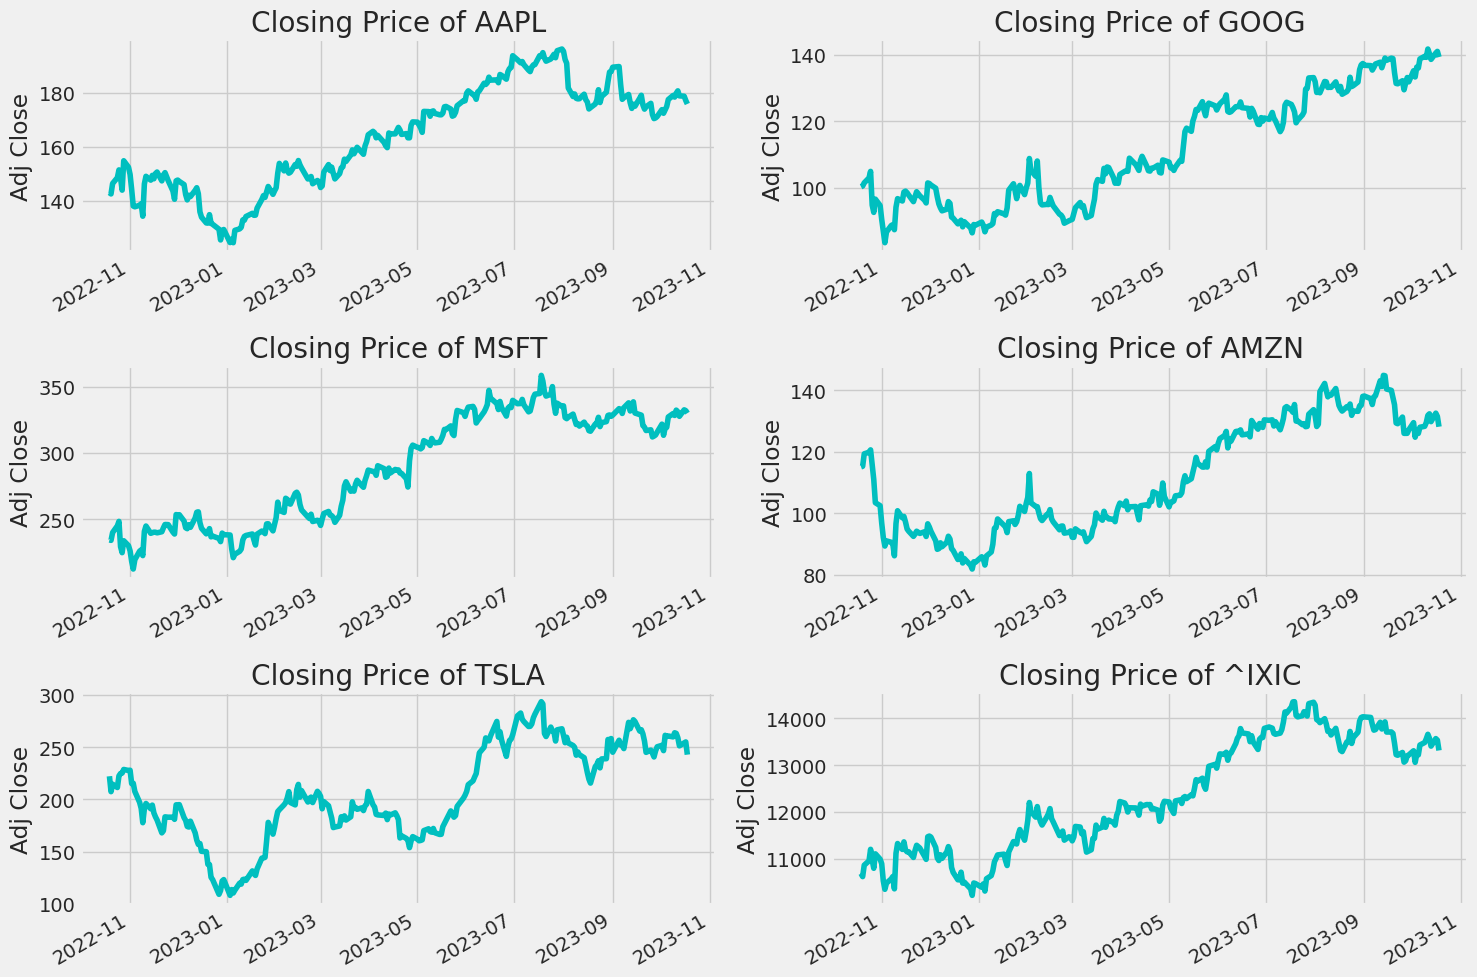

In [15]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot(color="c")
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# 3. Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot(color='m')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 4. The moving average of the stocks

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

company_list[5][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Nasdaq_Index')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[1,1].set_title('TESLA')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[1,1].set_title('APPLE')


fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 5. The daily return of the stock on average

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

company_list[5]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',color='seagreen')
axes[0,0].set_title('Nasdaq_Index')

AAPL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',color='seagreen')
axes[0,1].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',color='seagreen')
axes[1,0].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o',color='seagreen')
axes[1,1].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o',color='seagreen')
axes[2,0].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o',color='seagreen')
axes[2,1].set_title('TESLA')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

In [ ]:
plt.figure(figsize=(20, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlim([-0.05,0.05])
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 6.  the correlation between different stocks closing prices

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
# We'll use joinplot to compare the daily returns of Google and Tesla
# We'll use joinplot to compare the daily returns of Google and Nasdaq_index

sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='hex', color='seagreen').fig.set_size_inches(4,4)
sns.jointplot(x='GOOG', y='TSLA', data=tech_rets, kind='hex').fig.set_size_inches(4,4)
sns.jointplot(x='GOOG', y='^IXIC', data=tech_rets, kind='hex',color='c').fig.set_size_inches(4,4)

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

It might be interesting to investigate that individual comaprison. sns.PairGrid()` is fantastic ` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. 

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 7. risk analysis of  various stock

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the closing price stock price throught CNN and LSTM

# 1 Load data and EDA

### 1.1 Get the data
Get the stock quote from yahoo with the datatime from 2012 till now. According to the observation above, we can find the Apple is most stable and related to the Nasdaq_index, while the Tesla is the riskiest. So we dicede to choose the data of Apple and Tesla to train and validate the model.

In [16]:
# Get the stock quote
df_AP = pdr.get_data_yahoo(['AAPL'], start='2012-01-01', end=datetime.now())
df_TSL = pdr.get_data_yahoo(['TSLA'], start='2012-01-01', end=datetime.now())
df_NAS = pdr.get_data_yahoo(['^IXIC'], start='2012-01-01', end=datetime.now())
# Show teh data
df_AP

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466093,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672227,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-10-12,180.070007,182.339996,179.039993,180.710007,180.710007,56743100
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000


### 1.2  Curve of Close Price

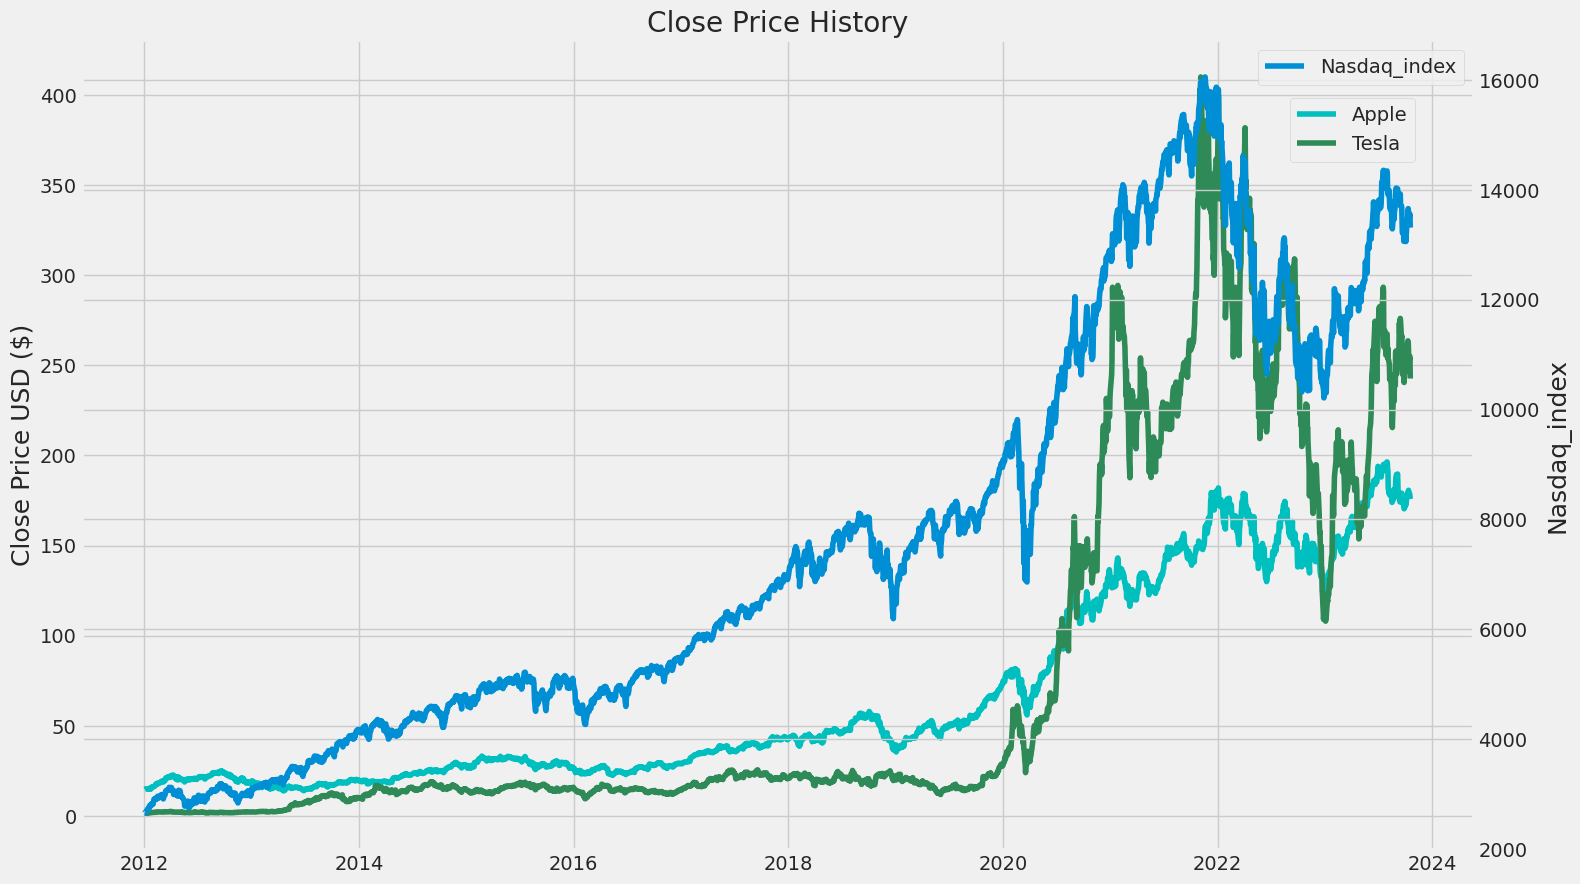

In [17]:

fig, ax1 = plt.subplots(figsize=(16,10))
#plt.figure(figsize=(16,6))
plt.title('Close Price History')
ax1.plot(df_AP['Close'],label='Apple',color='c')
ax1.plot(df_TSL['Close'],label='Tesla',color='seagreen')
plt.ylabel('Close Price USD ($)', fontsize=18)
ax1.legend(borderaxespad=3)
ax2 = ax1.twinx()
ax2.plot(df_NAS['Close'],label='Nasdaq_index')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Nasdaq_index', fontsize=18)
plt.legend()
plt.show()

# 2 Data Preprocessing
Create a new dataframe with only the 'Close column,then convert the dataframe to a numpy array. At last, we get the number of rows to train the model on.

### 2.1 Convert the data

In [18]:
def conv2value (df):
    data = df.filter(['Close'])
    dataset = data.values
    return dataset

### 2.2 Scale the data

In [19]:

from sklearn.preprocessing import MinMaxScaler
def scalevalue(dataset):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    return scaled_data,scaler

### 2.3 Creat training and testing data

In [20]:
# Create the training data set 
# Create the scaled training data set
def creatdataset(df):
    dataset=conv2value(df)
    scaled_data,scaler=scalevalue(dataset)
    
    training_data_len = int(np.ceil( len(dataset) * .9 ))
    train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        #if i<= 61:
            #print(x_train)
            #print(y_train)
            #print()
        # Create the testing data set
        # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape
# Create a new array containing scaled values from index 1543 to 2002 
    test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
    x_test = []
    y_test = scaled_data[training_data_len:, :]
    #print(y_test)
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
    x_test = np.array(x_test)

# Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    return x_train, y_train,x_test,y_test,scaler

# 3 Using CNN Predicting the closing price stock price of APPLE 

Convolutional neural network (CNN) is a regularized type of feed-forward neural network that learns feature engineering by itself via filters optimization. It's not designed to deal with time serious problem. So we crop a data of 60 days and moving forward with a granularity of 1 day. The input size is (len(data), 60,1)

In [21]:

X_train,y_train,X_test,y_test,scaler=creatdataset(df_AP)


In [69]:
from keras.layers import Dense, Conv1D, Flatten
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import json
#Build the model
model = Sequential()
model.add(Conv1D(5,3, strides=1, activation='relu',input_shape=(60,1)))
model.add(Flatten())
#model.add(Dense(10, activation='relu',input_shape=(14,)))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='mse')
print(model.summary())

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 58, 5)             20        
                                                                 
 flatten_2 (Flatten)         (None, 290)               0         
                                                                 
 dense_52 (Dense)            (None, 40)                11640     
                                                                 
 dense_53 (Dense)            (None, 1)                 41        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test=np.reshape(y_test, (y_test.shape[0], 1))

In [71]:
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test=np.reshape(y_test, (y_test.shape[0], 1))
#model_file = "cnnspx.h5"
#hist_file = "cnnspx_hist.json"
hist = []

history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),shuffle=False,verbose=2)    
hist = history.history
#model.save(model_file)


Epoch 1/200
82/82 - 1s - loss: 0.0939 - val_loss: 0.3264 - 1s/epoch - 15ms/step
Epoch 2/200
82/82 - 0s - loss: 0.0500 - val_loss: 0.0685 - 246ms/epoch - 3ms/step
Epoch 3/200
82/82 - 0s - loss: 0.0231 - val_loss: 0.0108 - 235ms/epoch - 3ms/step
Epoch 4/200
82/82 - 0s - loss: 0.0094 - val_loss: 0.0077 - 220ms/epoch - 3ms/step
Epoch 5/200
82/82 - 0s - loss: 0.0044 - val_loss: 0.0071 - 218ms/epoch - 3ms/step
Epoch 6/200
82/82 - 0s - loss: 0.0030 - val_loss: 0.0070 - 249ms/epoch - 3ms/step
Epoch 7/200
82/82 - 0s - loss: 0.0025 - val_loss: 0.0070 - 256ms/epoch - 3ms/step
Epoch 8/200
82/82 - 0s - loss: 0.0022 - val_loss: 0.0072 - 225ms/epoch - 3ms/step
Epoch 9/200
82/82 - 0s - loss: 0.0020 - val_loss: 0.0073 - 234ms/epoch - 3ms/step
Epoch 10/200
82/82 - 0s - loss: 0.0019 - val_loss: 0.0075 - 236ms/epoch - 3ms/step
Epoch 11/200
82/82 - 0s - loss: 0.0018 - val_loss: 0.0077 - 228ms/epoch - 3ms/step
Epoch 12/200
82/82 - 0s - loss: 0.0017 - val_loss: 0.0078 - 217ms/epoch - 3ms/step
Epoch 13/200
82

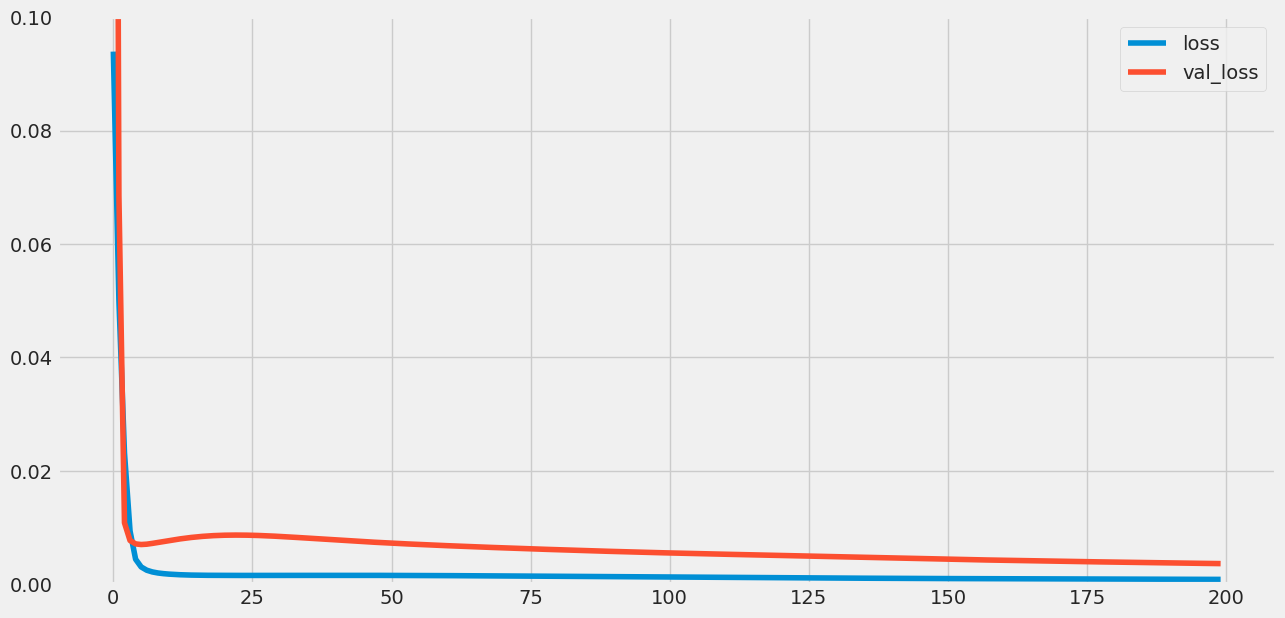

In [72]:
plt.figure(figsize=(14,7))

plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.ylim(0,0.1)
plt.legend()
plt.show()

In [73]:
Xt = model.predict(X_test)
yactual = pd.Series(scaler.inverse_transform(y_test.reshape(-1,1)).reshape(-1))
ypred = pd.Series((scaler.inverse_transform(Xt)).reshape(-1))
yema = yactual.ewm(span=3).mean()
signal = pd.Series(index = yactual.index, data = np.zeros(yactual.size))
pdiff = ypred.diff(5)
adiff = yema.diff(5)
for i in yactual.index:
    if (pdiff[i] > 0 and adiff[i] > 0) or (pdiff[i] < 0 and adiff[i] < 0):
        signal[i] = 200
    else:
        signal[i] = 180
del pdiff
del adiff

10/10 [==============================] - 0s 2ms/step


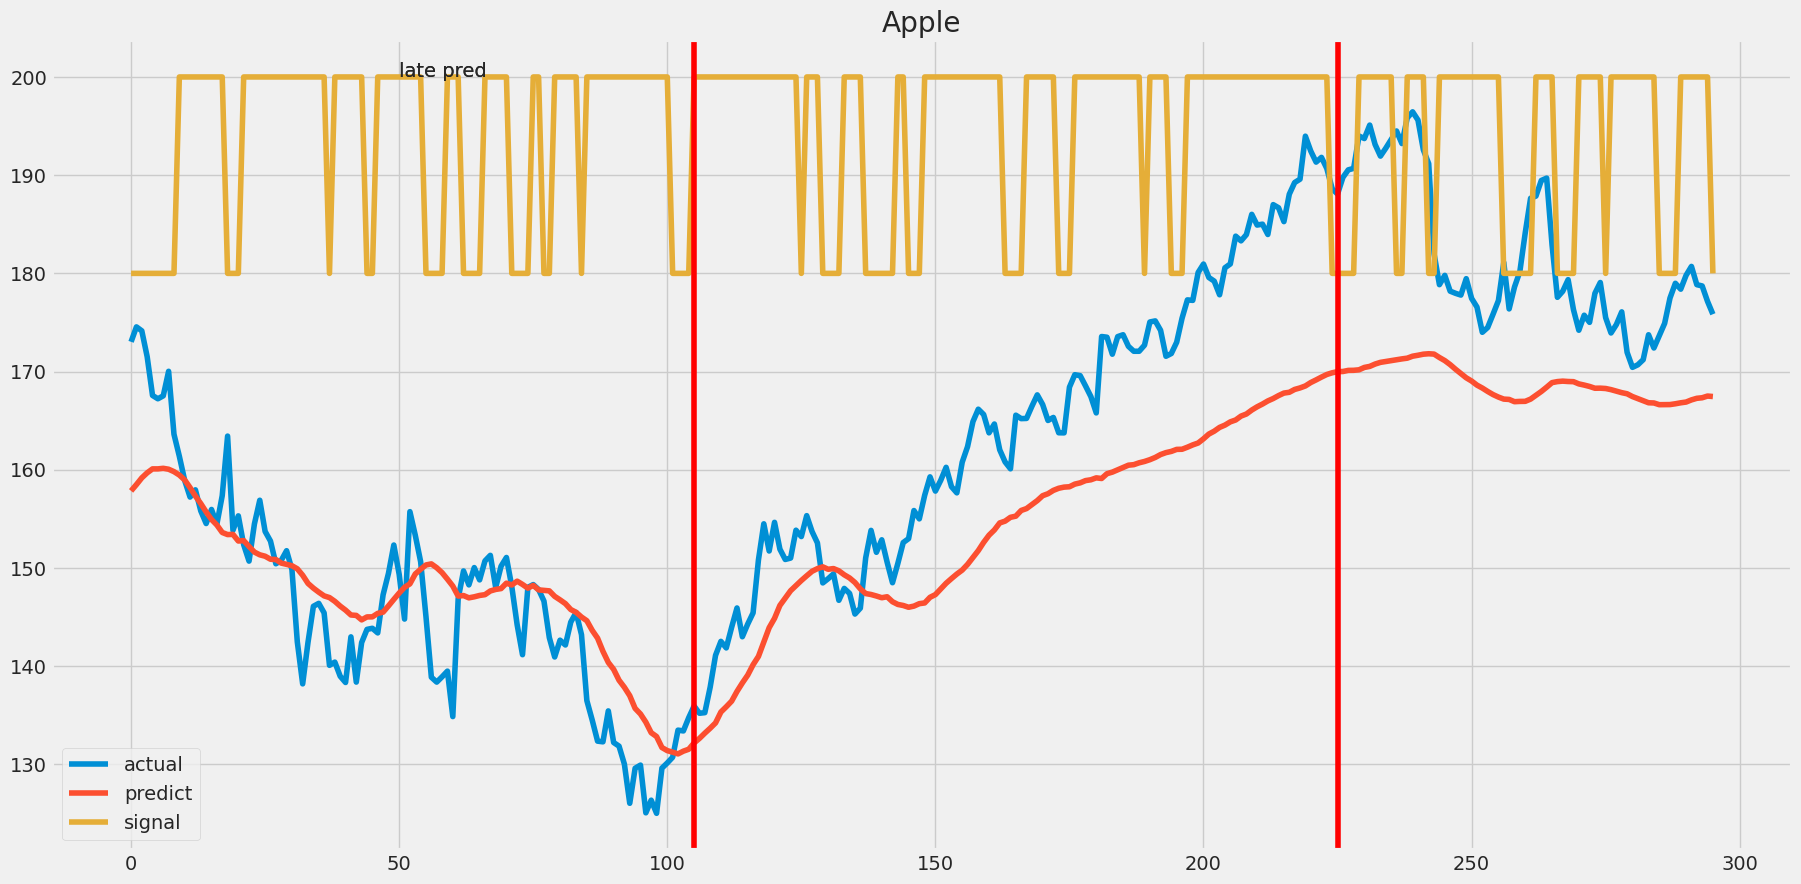

In [74]:
plt.figure(figsize=(20,10))
plt.plot(yactual, label='actual')
plt.plot(ypred, label='predict')
#plt.plot(yema)
plt.plot(signal, label='signal')
plt.annotate('late pred',(50,200))
plt.axvline(x=105.0, color='r', linestyle='-')
plt.annotate('late pred',(50,200))
plt.axvline(x=225, color='r', linestyle='-')
plt.title('Apple')
plt.legend()
plt.show()

/tmp/ipykernel_32/2059464383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = ypred


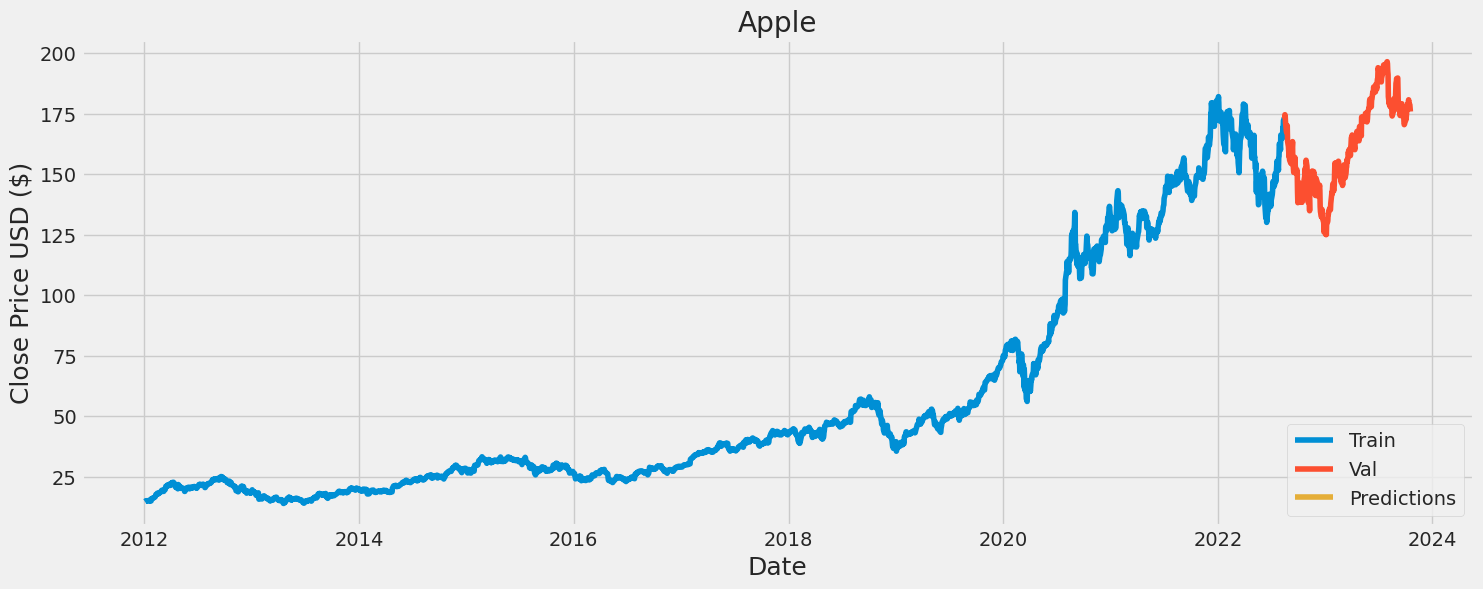

In [75]:
# Plot the data
training_data_len=int(len(df_AP)*0.9)+1
train = df_AP[:training_data_len]
valid = df_AP[training_data_len:]
valid['Predictions'] = ypred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Apple')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# 4 Using LSTM Predicting the closing price stock price of APPLE,TESLA,and NASDAQ-INDEX

Long short-term memory (LSTM) network is a recurrent neural network (RNN), aimed to deal with the vanishing gradient problem. It aims to provide a short-term memory for RNN that can last thousands of timesteps. It is applicable to classification, processing and predicting data based on time series.

In [77]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
def LSTM_predict_curve(df_AP,name,opt,bs,l1,l2):
    X_train,y_train,X_test,y_test,scaler=creatdataset(df_AP)
# Build the LSTM model
    model = Sequential()
    model.add(LSTM(l1, return_sequences=True, input_shape= (X_train.shape[1], 1)))
    model.add(LSTM(l2, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

# Compile the model
    model.compile(optimizer=opt, loss='mean_squared_error')

# Train the model
    model.fit(X_train, y_train, batch_size=bs, epochs=1)
# Get the models predicted price values 
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

# Visualize the data
# Plot the data
    training_data_len=int(len(df_AP)*0.9)+1
    train = df_AP[:training_data_len]
    valid = df_AP[training_data_len:]
    valid['Predictions'] = predictions
    plt.figure(figsize=(16,6))
    plt.title(f'{name}')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    
    Xt = model.predict(X_test)
    yactual = pd.Series(scaler.inverse_transform(y_test.reshape(-1,1)).reshape(-1))
    ypred = pd.Series((scaler.inverse_transform(Xt)).reshape(-1))
    yema = yactual.ewm(span=3).mean()
    signal = pd.Series(index = yactual.index, data = np.zeros(yactual.size))
    pdiff = ypred.diff(5)
    adiff = yema.diff(5)
    for i in yactual.index:
        if (pdiff[i] > 0 and adiff[i] > 0) or (pdiff[i] < 0 and adiff[i] < 0):
            signal[i] = 200
        else:
            signal[i] = 180
    del pdiff
    del adiff
    
    plt.figure(figsize=(20,10))
    plt.plot(yactual, label='actual')
    plt.plot(ypred, label='predict')
    #plt.plot(yema)
    plt.title(f'{name}')
    plt.legend()
    plt.show()

10/10 [==============================] - 1s 35ms/step


/tmp/ipykernel_32/4152263259.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


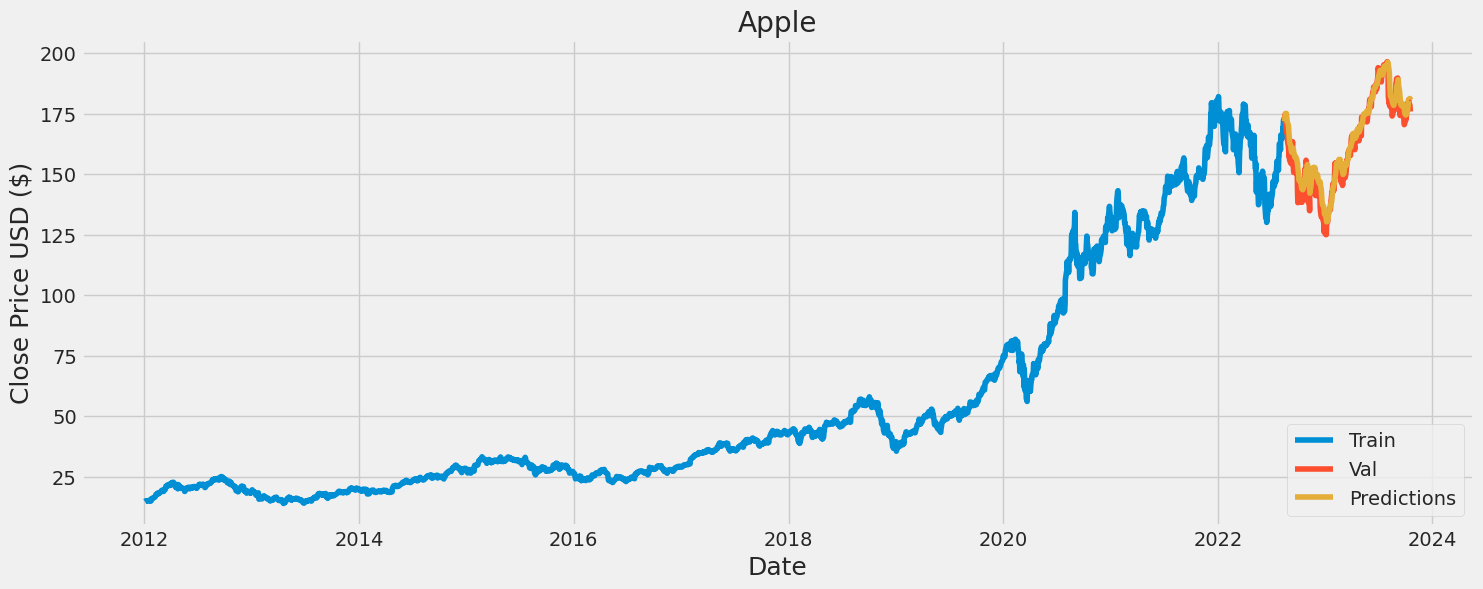

10/10 [==============================] - 0s 35ms/step


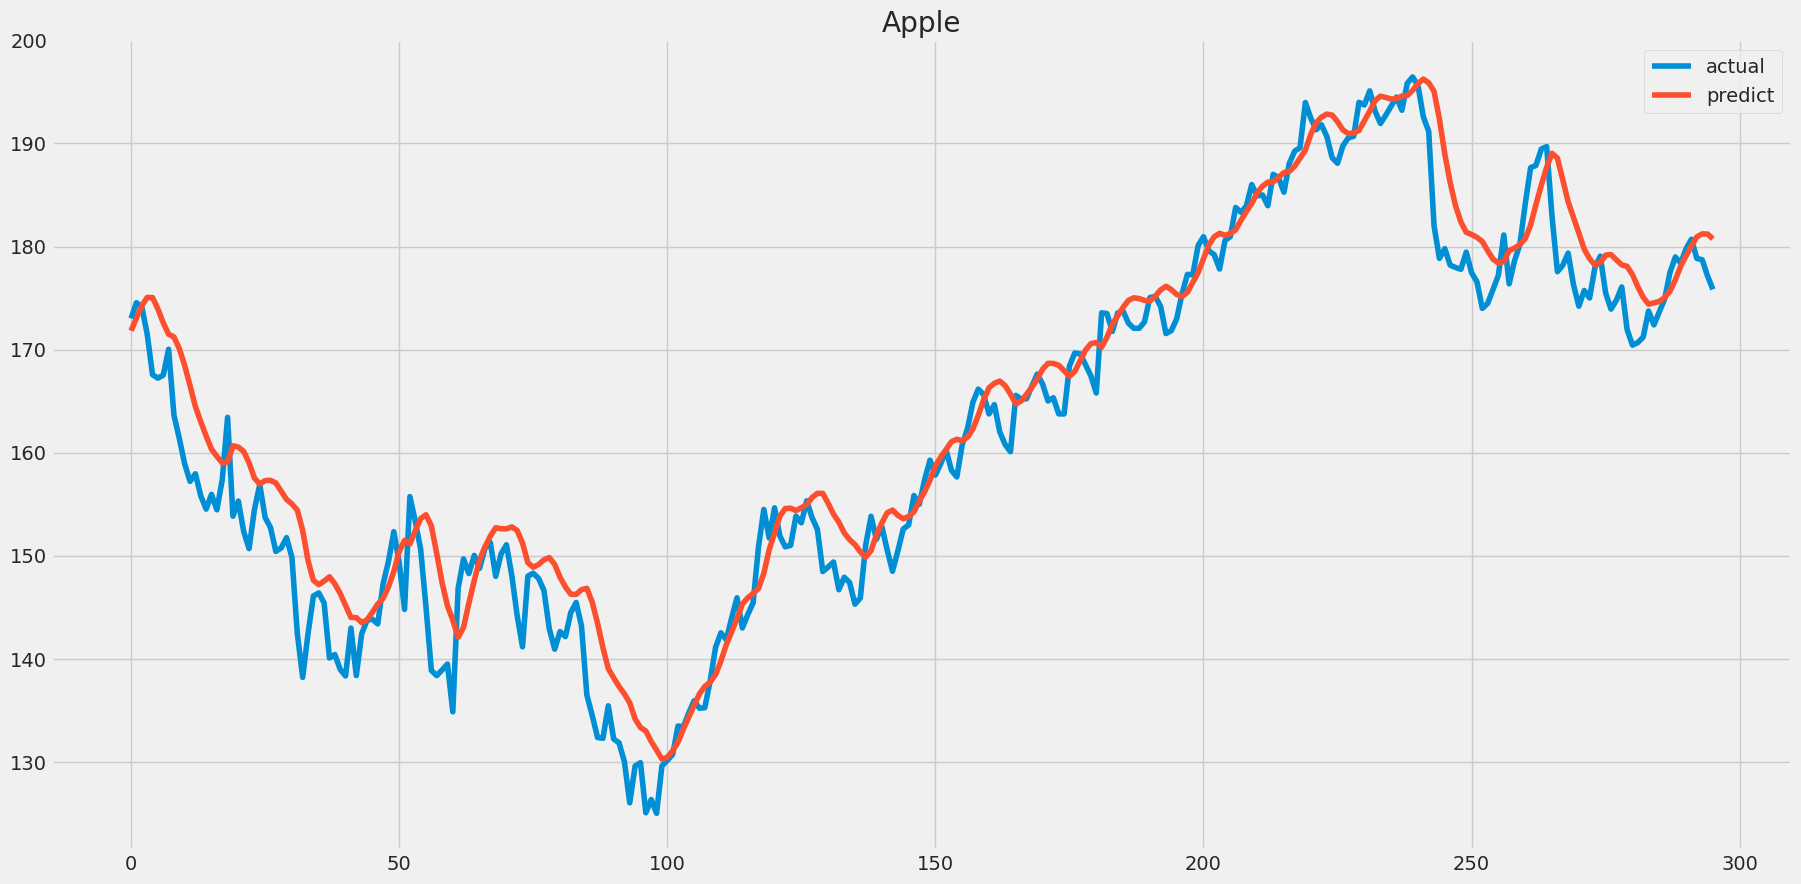

In [78]:
LSTM_predict_curve(df_AP,'Apple','adam',1,128,64)

10/10 [==============================] - 1s 35ms/step


/tmp/ipykernel_32/4152263259.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


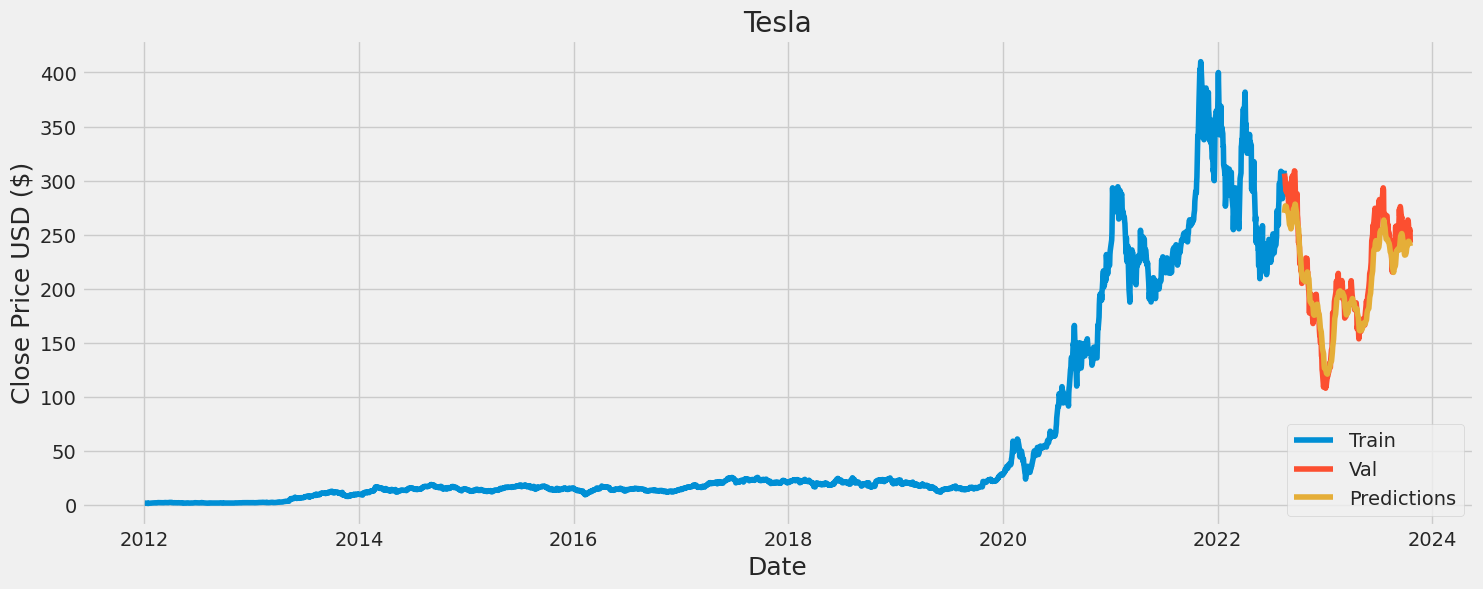

10/10 [==============================] - 0s 35ms/step


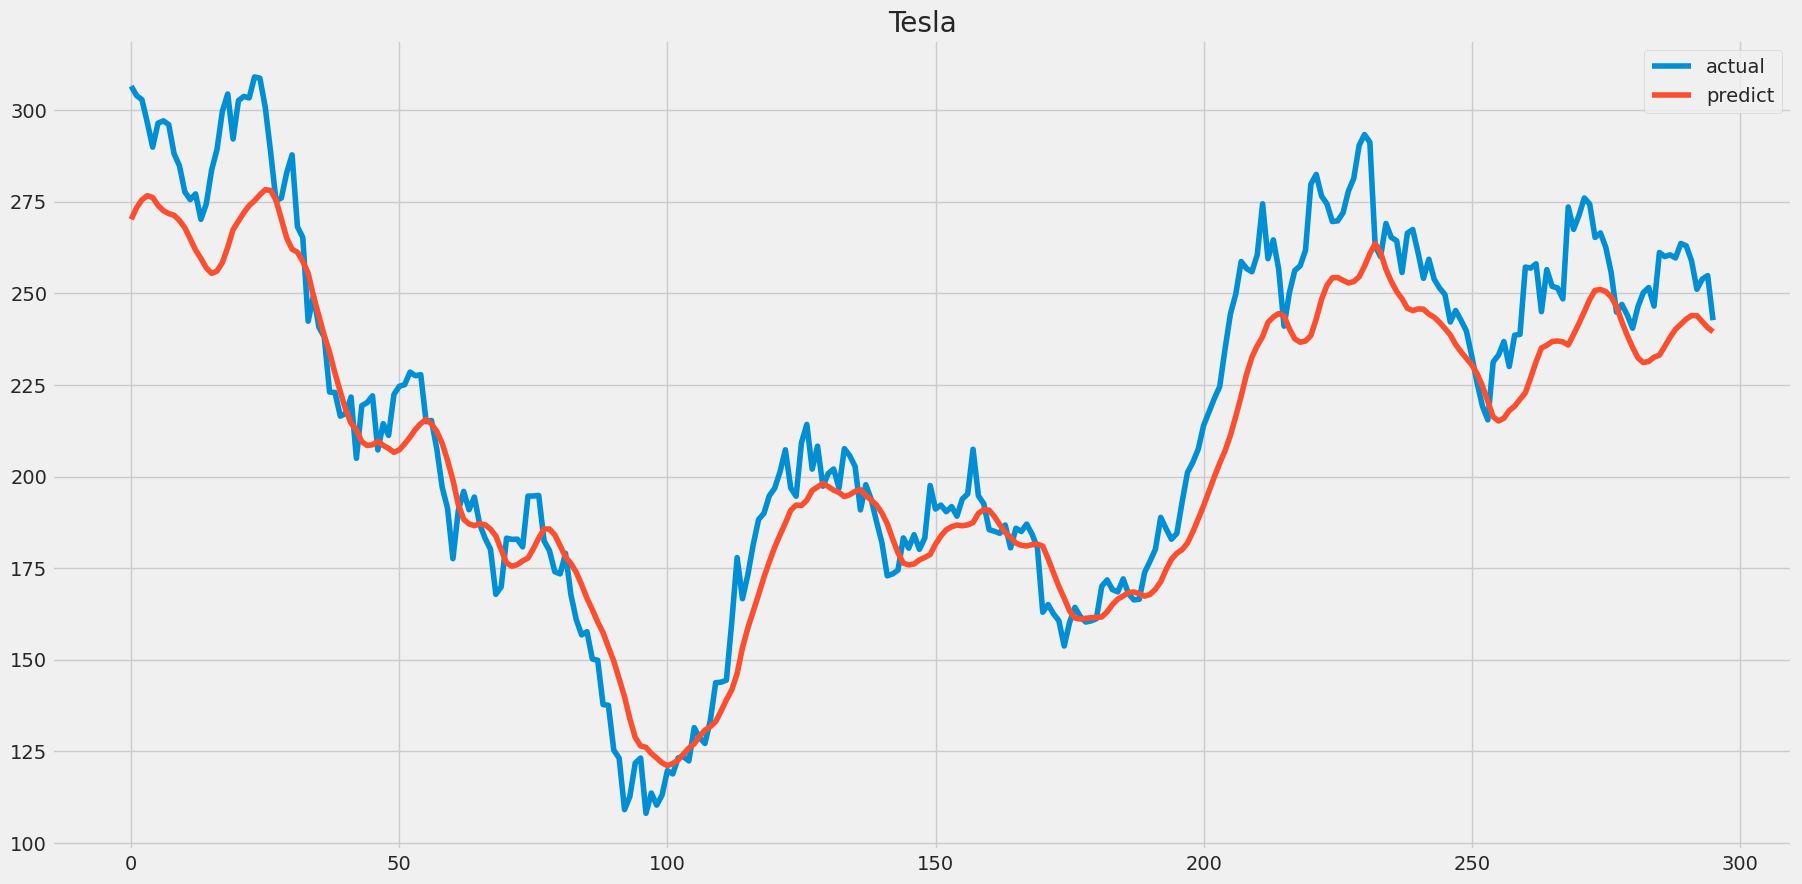

In [79]:
LSTM_predict_curve(df_TSL,'Tesla','adam',1,128,64)

10/10 [==============================] - 1s 35ms/step


/tmp/ipykernel_32/4152263259.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


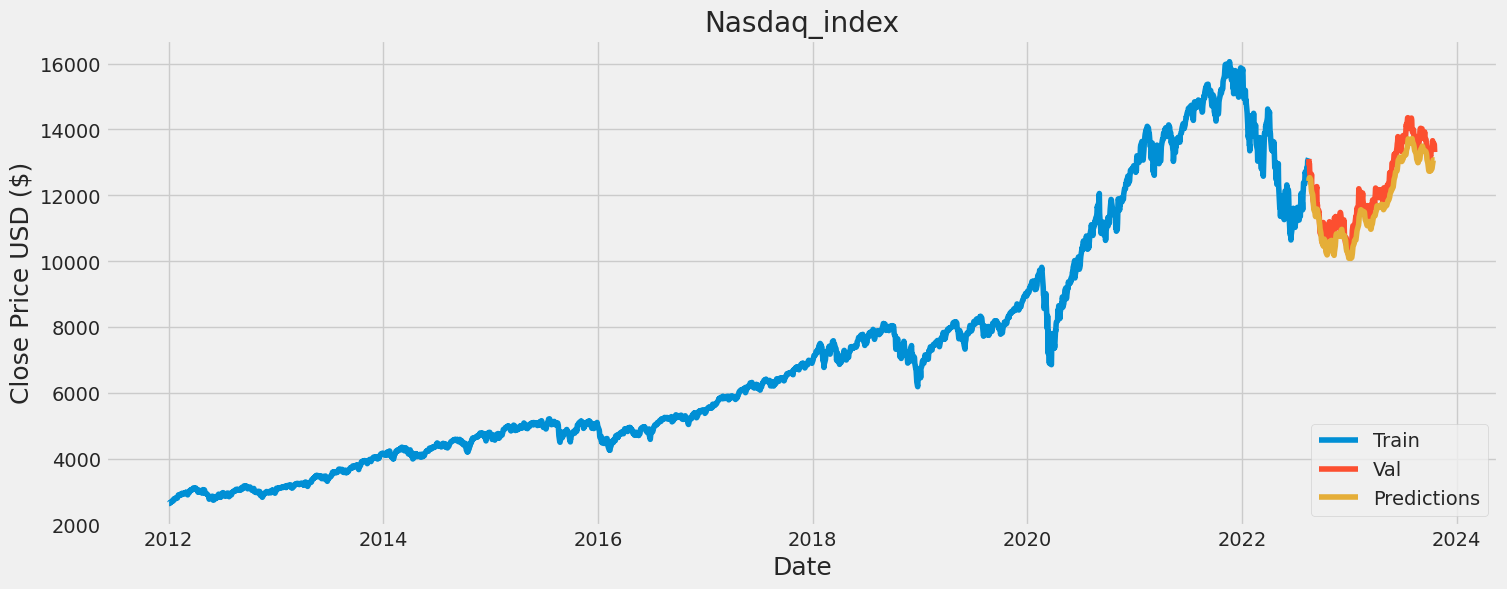

10/10 [==============================] - 0s 35ms/step


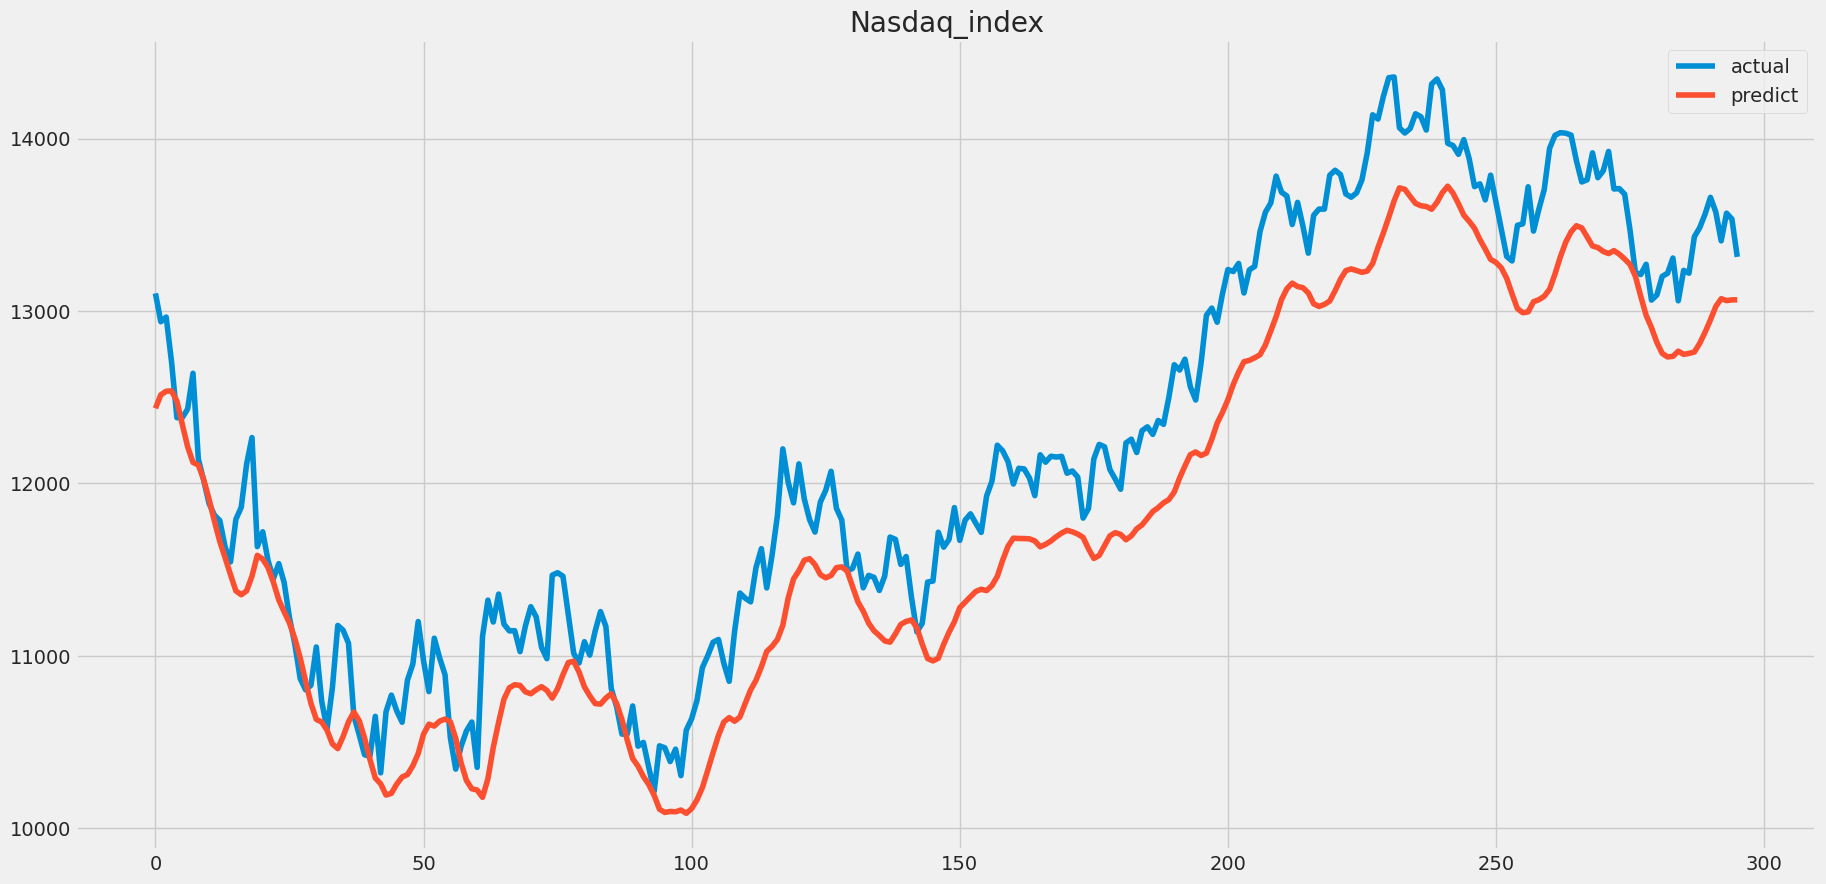

In [80]:
LSTM_predict_curve(df_NAS,'Nasdaq_index','adam',1,128,64)

# 5 Hyperparameter-tuning on LSTM

To seek for the optimal parameters of the model,we attempted to use hyperparameter-tuning.we selct the number of nuerons every layer shile optimizer and batch_size are also significant. The parameter lists are as follows.

layer1=[128,256]

layer2=[32,64]

optimazer=['adam','SGD']

batch_size=[1,4]

In [64]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
layer1=[128,256]
layer2=[32,64]
optimazer=['adam','SGD']
batch_size=[1,4]

def LSTM_hyperparameters(df_AP,opt,bs,lay1,lay2):
    X_train,y_train,X_test,y_test,scaler=creatdataset(df_AP)
# Build the LSTM model
    model = Sequential()
    model.add(LSTM(lay1, return_sequences=True, input_shape= (X_train.shape[1], 1)))
    model.add(LSTM(lay2, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

# Compile the model
    model.compile(optimizer=opt, loss='mean_squared_error')

# Train the model
    model.fit(X_train, y_train, batch_size=bs, epochs=1)
# Get the models predicted price values 
    Xt = model.predict(X_test)
    yactual = pd.Series(scaler.inverse_transform(y_test.reshape(-1,1)).reshape(-1))
    ypred = pd.Series((scaler.inverse_transform(Xt)).reshape(-1))
    mse=mean_squared_error(yactual,ypred)
    return mse
def hyper_proc(optimazer,batch_size,layer1,layer2):
    mse_optimal=0
    parameter_list=[[i,j,k,z] for i in optimazer for j in batch_size for k in layer1 for z in layer2]
    for opt,bs,l1,l2 in parameter_list:
        print(bs)
        mse=LSTM_hyperparameters(df_AP,opt,bs,l1,l2)
        if mse<mse_optimal or mse_optimal==0:
            mse_optimal=mse
            para_optimal=[opt,bs,l1,l2]
    return mse_optimal,para_optimal
hyper_proc(optimazer,batch_size,layer1,layer2)

1
10/10 [==============================] - 1s 33ms/step
1
10/10 [==============================] - 1s 35ms/step
1
10/10 [==============================] - 1s 55ms/step
1
10/10 [==============================] - 1s 57ms/step
4
10/10 [==============================] - 1s 33ms/step
4
10/10 [==============================] - 1s 35ms/step
4
10/10 [==============================] - 1s 57ms/step
4
10/10 [==============================] - 1s 57ms/step
1
10/10 [==============================] - 1s 32ms/step
1
10/10 [==============================] - 1s 37ms/step
1
10/10 [==============================] - 1s 55ms/step
1
10/10 [==============================] - 1s 58ms/step
4
10/10 [==============================] - 1s 32ms/step
4
10/10 [==============================] - 1s 35ms/step
4
10/10 [==============================] - 1s 56ms/step
4
10/10 [==============================] - 1s 59ms/step


(19.023953142877772, ['adam', 4, 256, 64])

10/10 [==============================] - 1s 59ms/step


/tmp/ipykernel_32/4152263259.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


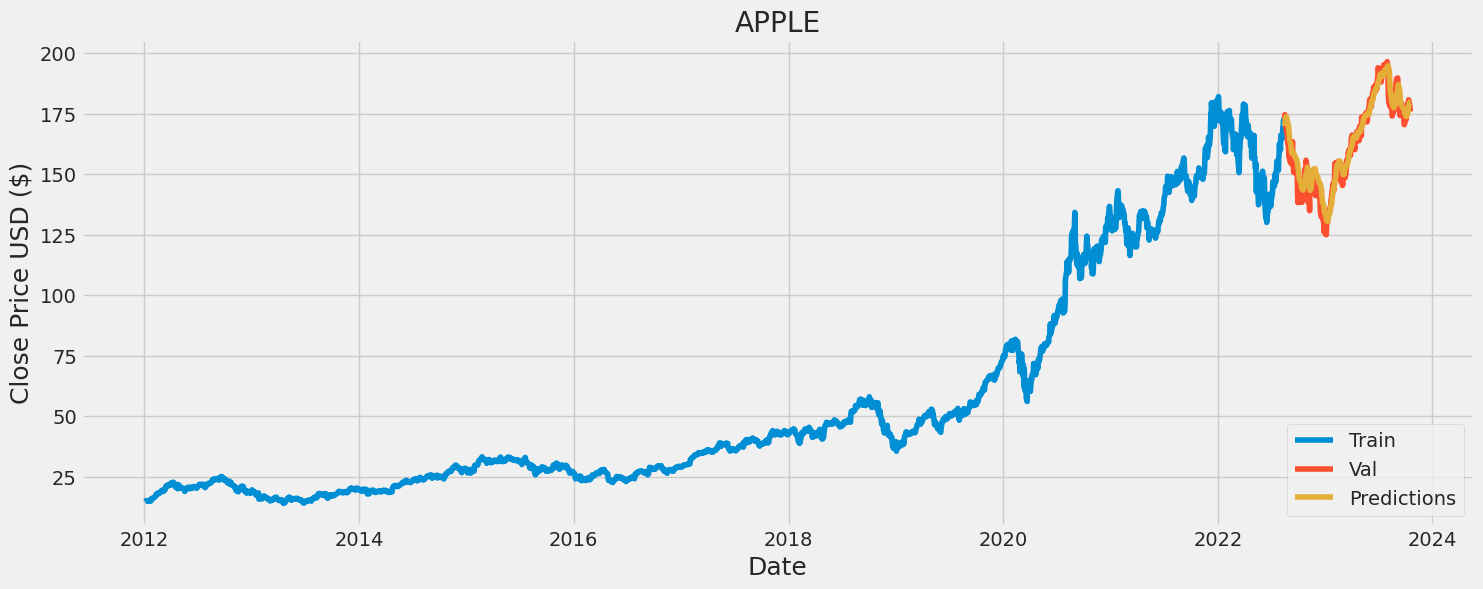

10/10 [==============================] - 1s 61ms/step


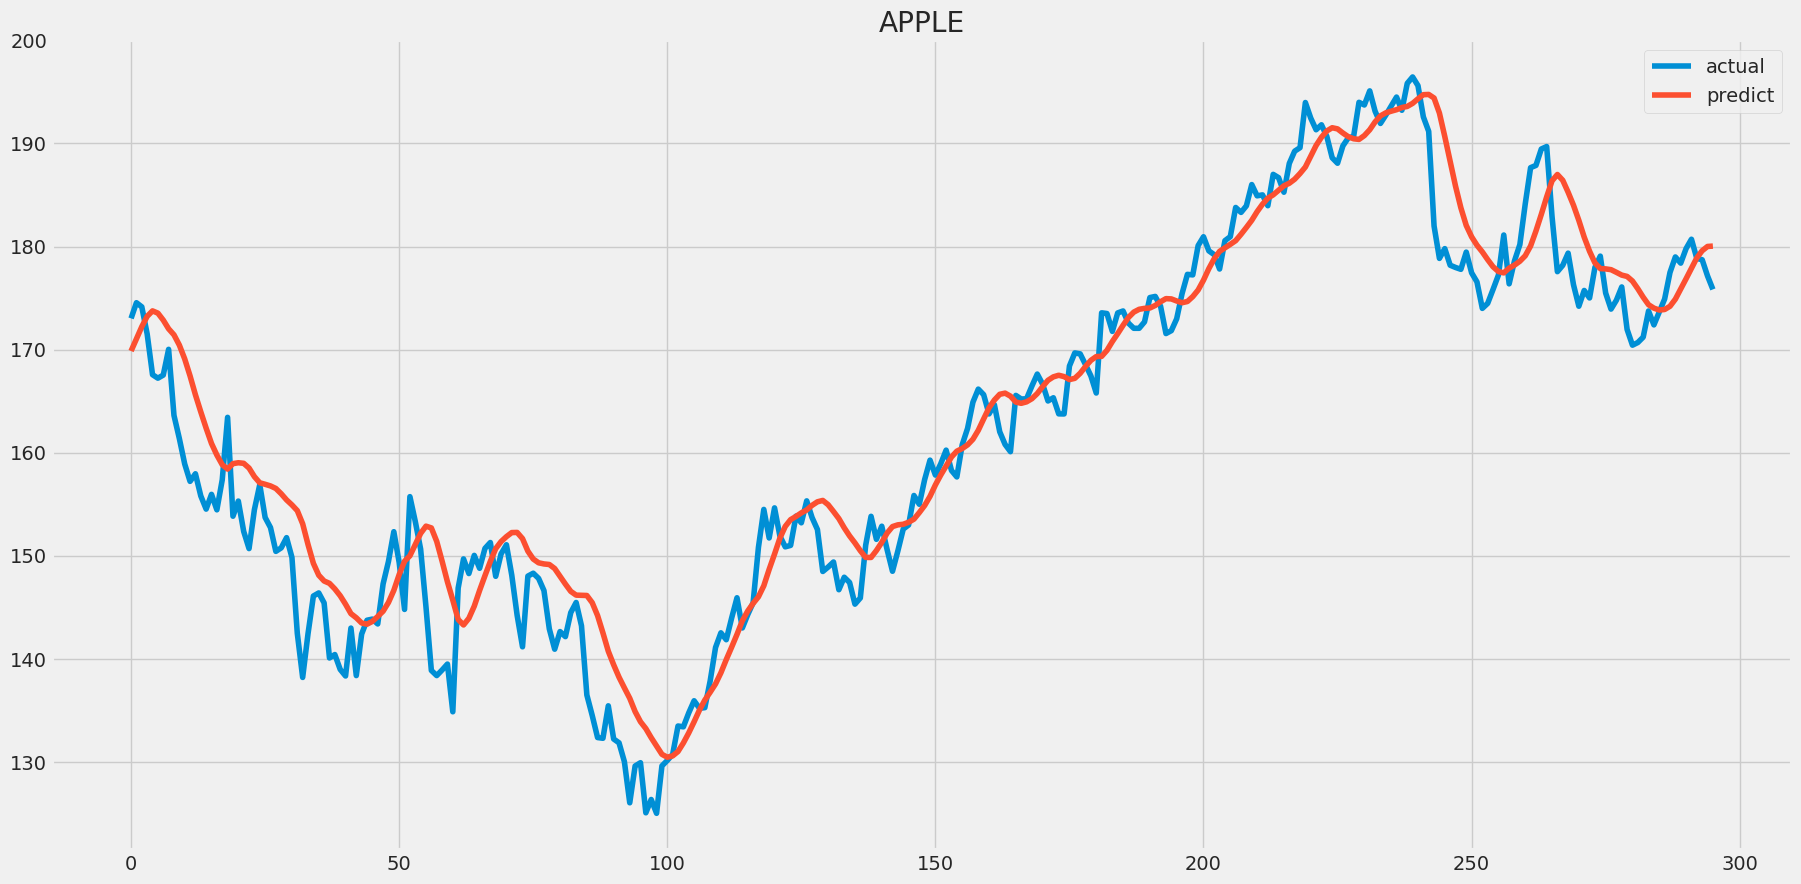

In [87]:
LSTM_predict_curve(df_AP,'APPLE','adam',4,256,64)

The loss value of Apple is 0.0017 whereas the loss value went down to 0.0007 while leveraging opitimal parameters. And visualization of the predictions also demonstrate that the tuned ones is better.

# 6 Conclusion
Generally, LSTM should be better to predict the time serious problem. Not surprisingly, in this project, the LSTM performs better than CNN, althrouh the CNN method has trained 200 epochs, whereas the LSTM trained 1 epoch.

Meanwhile, we experient three datasets with the same LSTM model. The curves of predictions are nearly parallel. It demonstrate that LSTM is a efficient method to predict the trend. Even so, the CNN also is qualified for the stock prediction.

Unevitable, we utilized hyperparameter-tuning to find out the optimal parameters for the model. And compared with these two models, we can reckon that the tuning is effevtive.

The deficience of the prediction is that the prediction curves are behindhand than the actual curves, so it will be unprecise if we attempt to invest with a short period way. However, it will be a good guide for us to find out the trends of the stock.